### Importing Pandas and uploading file


In [1]:
import pandas as pd
df = df = pd.read_csv(r"C:\Users\shahz\Downloads\Greetings H acquisition Insur4me Dataset (1).csv")
df.head()

,Country,Year,Month,Health insurance category,Revenue (£000),Customer volume,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,India,2022,1,Basic Health Insurance,"4,639","5,944",NaN,NaN,NaN,NaN
1,India,2022,1,Comprehensive Health Insurance,"10,376","15,788",NaN,NaN,NaN,NaN
2,India,2022,1,Critical Illness Insurance,"20,631","28,605",NaN,NaN,NaN,NaN
3,India,2022,1,Dental Insurance,"5,860","29,162",NaN,NaN,NaN,NaN
4,India,2022,1,Vision Insurance,"5,249","14,860",NaN,NaN,NaN,NaN


In [2]:
df['Health insurance category'] = df['Health insurance category'].replace({
    'Comprehensive Health Ins$$$$$$$': 'Comprehensive Health Insurance'
})


In [3]:
print(df['Health insurance category'].unique())


['Basic Health Insurance ' 'Comprehensive Health Insurance'
 'Critical Illness Insurance' 'Dental Insurance' 'Vision Insurance'
 'Travel Health Insurance' 'Vision Insurance ']


### Check missing values

In [4]:
df.isnull().sum() 
df.head()

,Country,Year,Month,Health insurance category,Revenue (£000),Customer volume,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,India,2022,1,Basic Health Insurance,"4,639","5,944",NaN,NaN,NaN,NaN
1,India,2022,1,Comprehensive Health Insurance,"10,376","15,788",NaN,NaN,NaN,NaN
2,India,2022,1,Critical Illness Insurance,"20,631","28,605",NaN,NaN,NaN,NaN
3,India,2022,1,Dental Insurance,"5,860","29,162",NaN,NaN,NaN,NaN
4,India,2022,1,Vision Insurance,"5,249","14,860",NaN,NaN,NaN,NaN


### Dropping rows with missing values and fixing column names

In [5]:
df = df.drop_duplicates()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.map(lambda x: x.strip().title() if isinstance(x, str) else x)
df = df.dropna(subset=['revenue_(£000)', 'customer_volume'])  # Replace with your real column names
df.head()


,country,year,month,health_insurance_category,revenue_(£000),customer_volume,unnamed:_6,unnamed:_7,unnamed:_8,unnamed:_9
0,India,2022,1,Basic Health Insurance,"4,639","5,944",NaN,NaN,NaN,NaN
1,India,2022,1,Comprehensive Health Insurance,"10,376","15,788",NaN,NaN,NaN,NaN
2,India,2022,1,Critical Illness Insurance,"20,631","28,605",NaN,NaN,NaN,NaN
3,India,2022,1,Dental Insurance,"5,860","29,162",NaN,NaN,NaN,NaN
4,India,2022,1,Vision Insurance,"5,249","14,860",NaN,NaN,NaN,NaN


In [6]:
before = df.shape[0]

df = df[~((df['revenue_(£000)'] == '-') & (df['customer_volume'] == '-'))]

after = df.shape[0]
print("Rows removed:", before - after)


Rows removed: 5


### Removing negative values from 'revenue_(£000)' and  'customer_volume' column

In [7]:
# Step 1: Strip spaces and commas
df['revenue_(£000)'] = df['revenue_(£000)'].astype(str).str.replace(',', '').str.strip()
df['customer_volume'] = df['customer_volume'].astype(str).str.replace(',', '').str.strip()

# Step 2: Convert to numeric
df['revenue_(£000)'] = pd.to_numeric(df['revenue_(£000)'], errors='coerce')
df['customer_volume'] = pd.to_numeric(df['customer_volume'], errors='coerce')


In [8]:
before = df.shape[0]

# Drop rows where both are negative or NaN
df = df[(df['revenue_(£000)'] >= 0) & (df['customer_volume'] >= 0)]

after = df.shape[0]
print("Rows before:", before)
print("Rows after:", after)
print("Rows removed:", before - after)


Rows before: 643
Rows after: 643
Rows removed: 0


In [9]:
df = df.dropna(axis=1, how='all')
df.shape

(643, 6)

In [10]:
print(" Descriptive statistics:")
print(df.describe())


📊 Descriptive statistics:
              year       month  revenue_(£000)  customer_volume
count   643.000000  643.000000      643.000000       643.000000
mean   2023.001555    6.496112    16292.748056     38584.213064
std       0.817448    3.447592    12119.026938     40180.701917
min    2022.000000    1.000000      195.000000       185.000000
25%    2022.000000    4.000000     5981.000000     11145.000000
50%    2023.000000    6.000000    14405.000000     26562.000000
75%    2024.000000    9.000000    23561.000000     50616.500000
max    2024.000000   12.000000    59577.000000    235345.000000


In [11]:
print("🧾 Column names in the dataset:")
print(df.columns.tolist())


🧾 Column names in the dataset:
['country', 'year', 'month', 'health_insurance_category', 'revenue_(£000)', 'customer_volume']


In [19]:
df.to_excel('cleaned_insurance_data.xlsx', index=False)


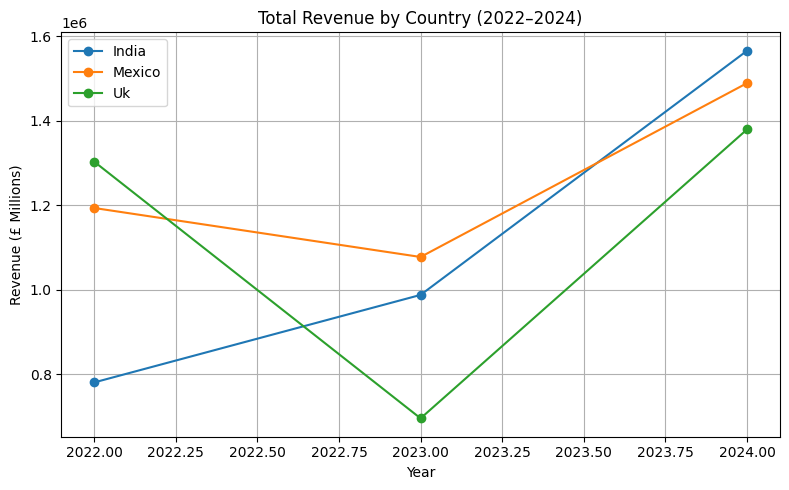

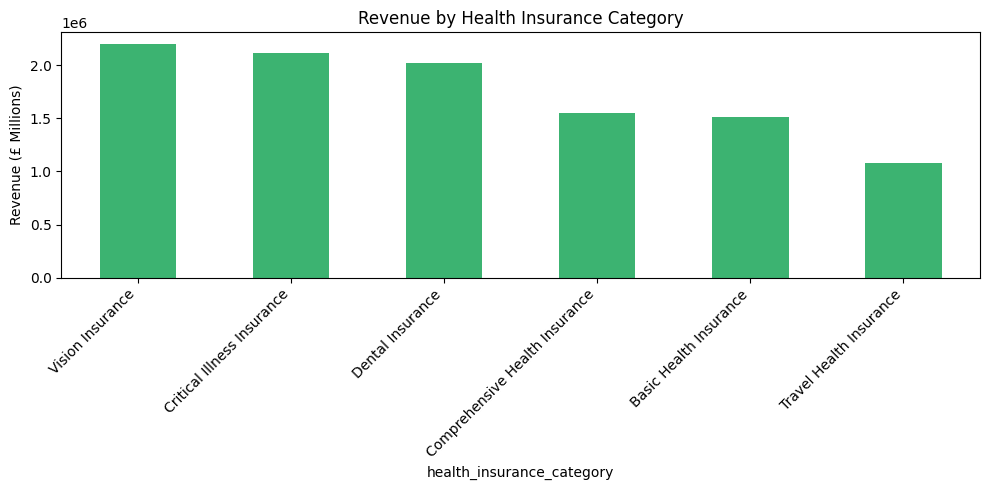

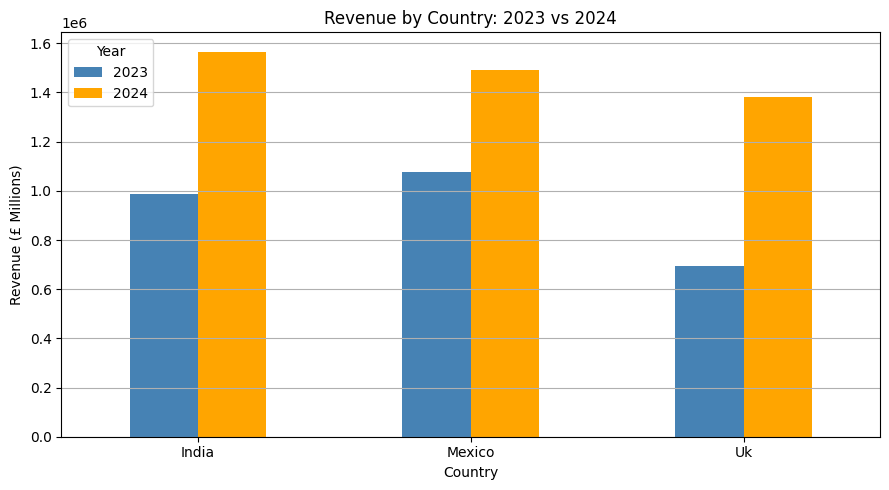

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# ------------------  1. Revenue by Country (2022–2024) ------------------
countries = df['country'].unique()
country_year = df.groupby(['country', 'year'])[['revenue_(£000)', 'customer_volume']].sum().reset_index()


plt.figure(figsize=(8, 5))
for country in countries:
    temp = country_year[country_year['country'] == country]
    plt.plot(temp['year'], temp['revenue_(£000)'], marker='o', label=country)

plt.title('Total Revenue by Country (2022–2024)')
plt.xlabel('Year')
plt.ylabel('Revenue (£ Millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------  2. Revenue by Health Insurance Category ------------------
product_summary = df.groupby('health_insurance_category')[['revenue_(£000)', 'customer_volume']].sum()
product_summary_sorted = product_summary.sort_values(by='revenue_(£000)', ascending=False)

plt.figure(figsize=(10, 5))
product_summary_sorted['revenue_(£000)'].plot(kind='bar', color='mediumseagreen')
plt.title('Revenue by Health Insurance Category')
plt.ylabel('Revenue (£ Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ------------------  3. Rebranding Impact (2023 vs 2024) ------------------
# Filter only 2023 and 2024 data
df_23_24 = df[df['year'].isin([2023, 2024])]

# Group by Country & Year
country_rebrand = df_23_24.groupby(['country', 'year'])['revenue_(£000)'].sum().unstack()

# Plot grouped bar chart
country_rebrand.plot(kind='bar', figsize=(9, 5), color=['steelblue', 'orange'])


plt.title('Revenue by Country: 2023 vs 2024')
plt.xlabel('Country')
plt.ylabel('Revenue (£ Millions)')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



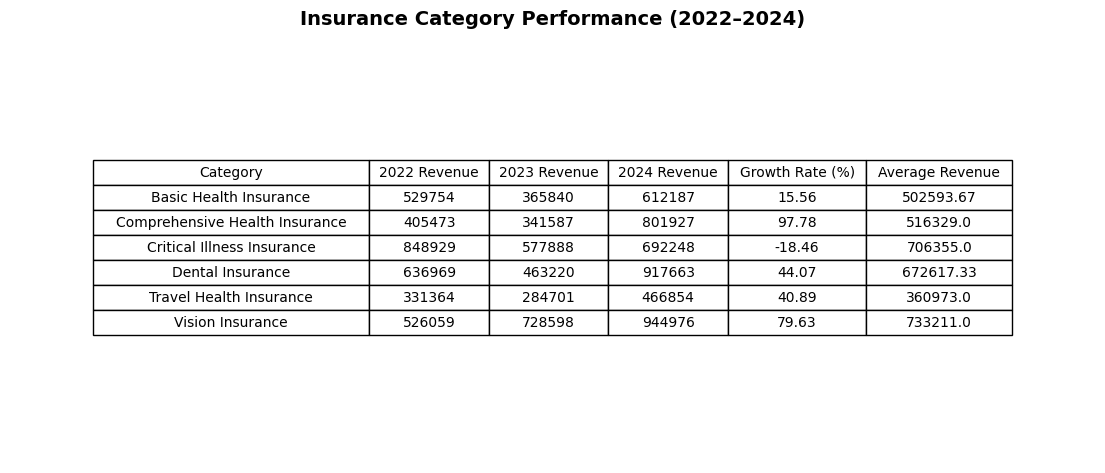

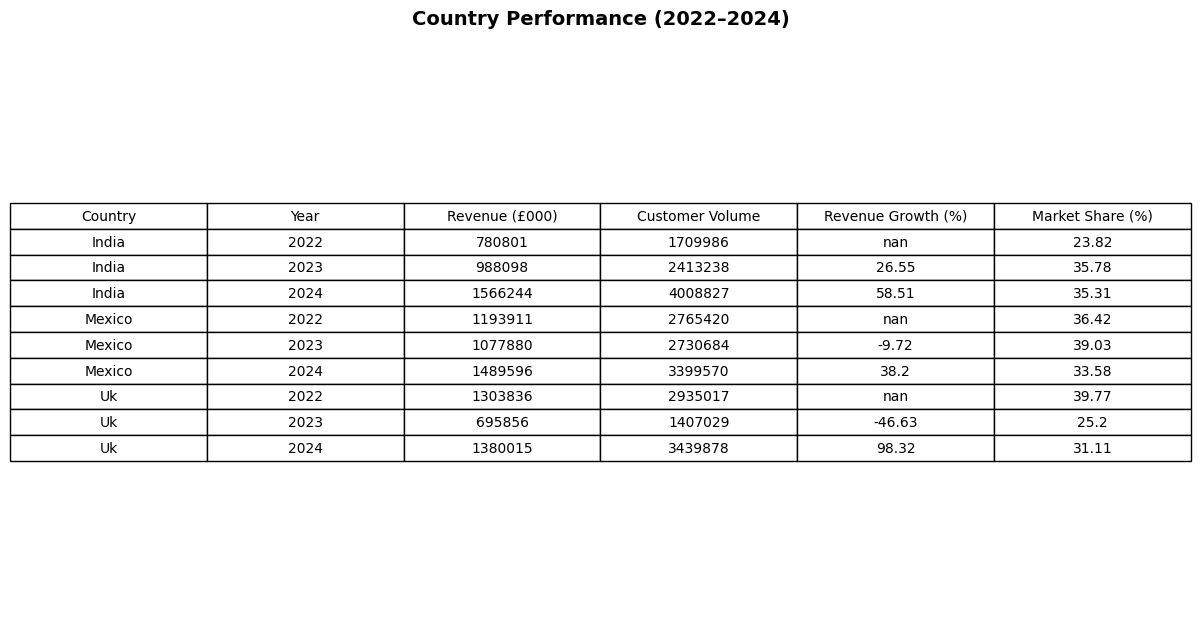

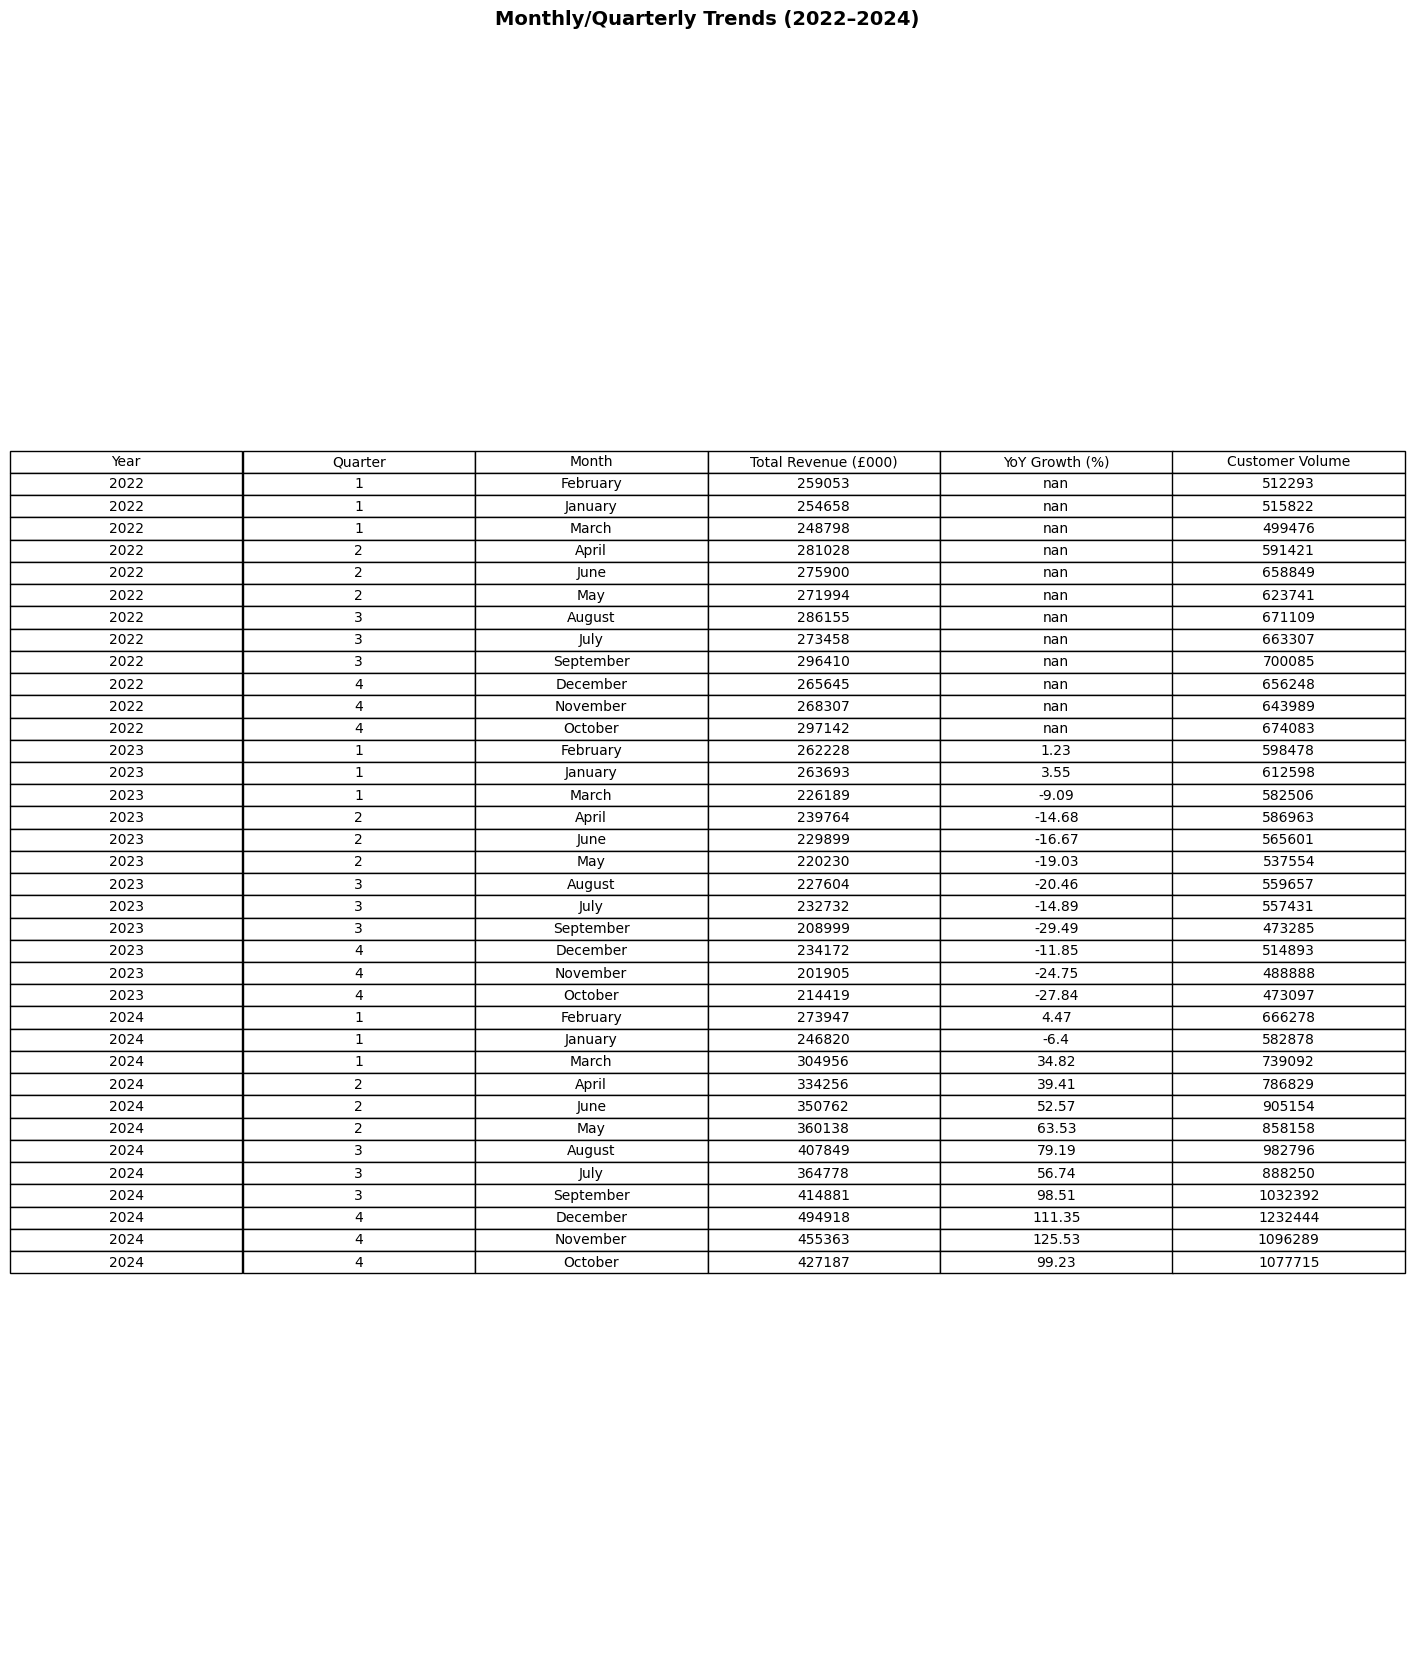

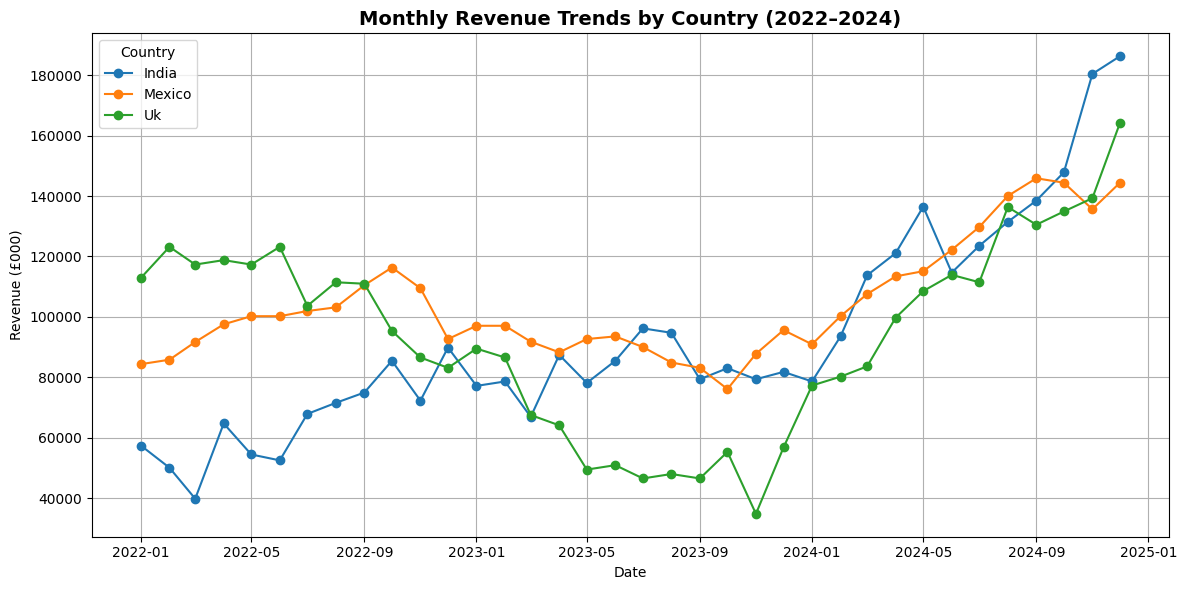

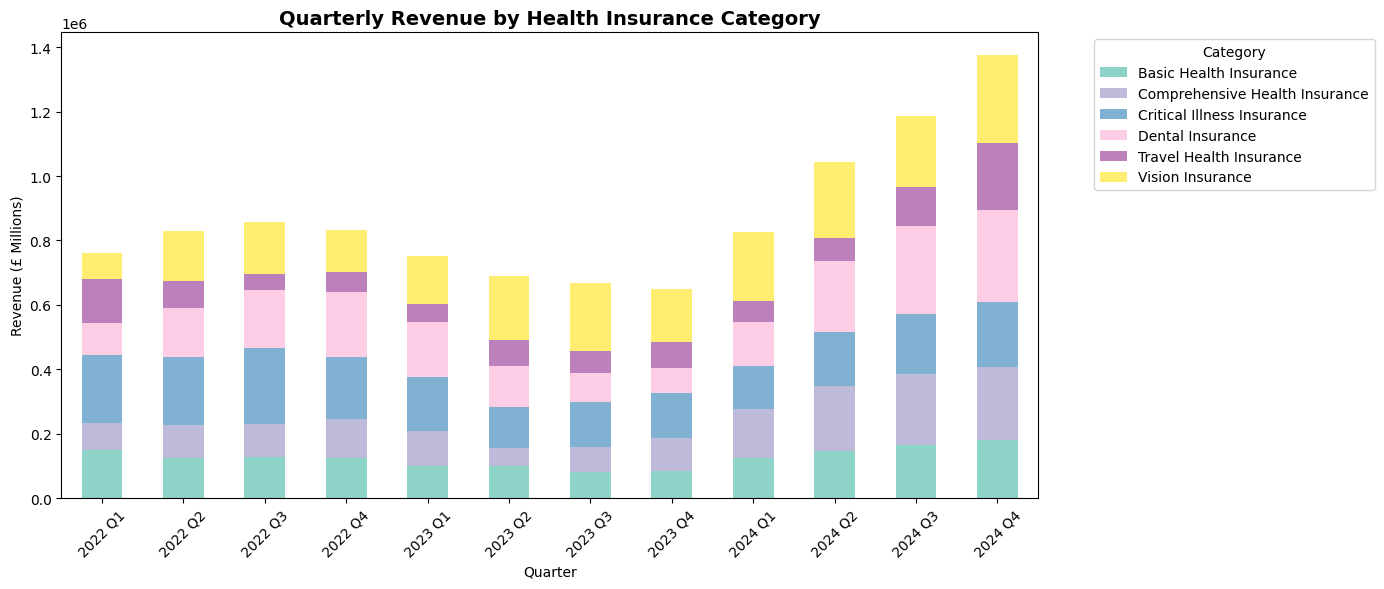

C:\Users\shahz\AppData\Local\Temp\ipykernel_34836\3150380487.py:204: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category_data['health_insurance_category'], rotation=45, ha='right')


TypeError: can only concatenate tuple (not "list") to tuple

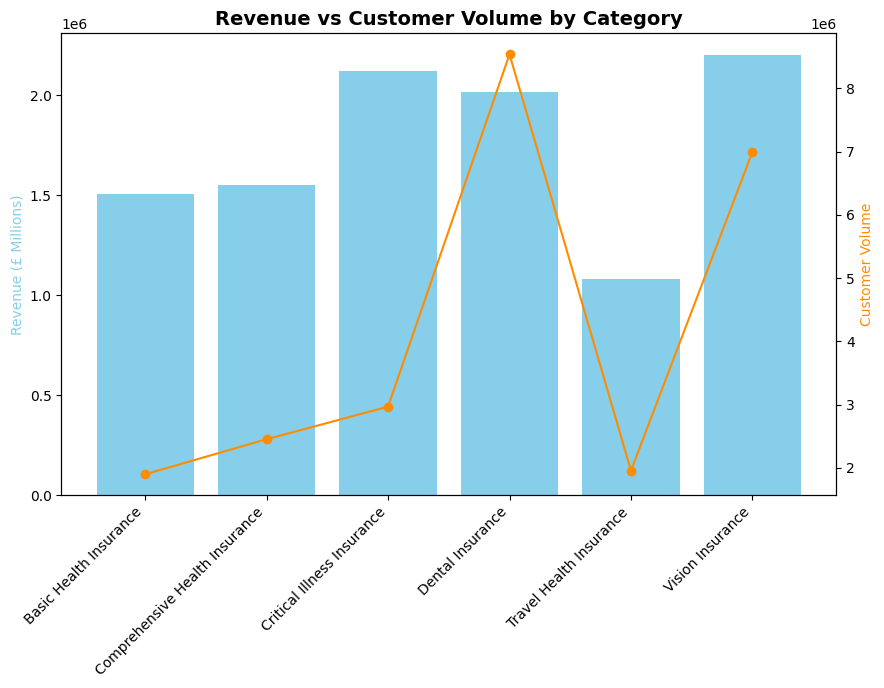

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot and calculate metrics
category_pivot = df.pivot_table(
    index='health_insurance_category',
    columns='year',
    values='revenue_(£000)',
    aggfunc='sum'
).reset_index()

category_pivot.columns.name = None
category_pivot = category_pivot.rename(columns={
    'health_insurance_category': 'Category',
    2022: '2022 Revenue',
    2023: '2023 Revenue',
    2024: '2024 Revenue'
})

category_pivot['Growth Rate (%)'] = (
    (category_pivot['2024 Revenue'] - category_pivot['2022 Revenue']) /
    category_pivot['2022 Revenue']
) * 100

category_pivot['Average Revenue'] = category_pivot[
    ['2022 Revenue', '2023 Revenue', '2024 Revenue']
].mean(axis=1)

category_pivot = category_pivot.round(2)

# Plot visual table
fig, ax = plt.subplots(figsize=(14, 0.6 * len(category_pivot) + 2))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=category_pivot.values,
    colLabels=category_pivot.columns,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Optional: Fit wide text
try:
    table.auto_set_column_width(col=list(range(len(category_pivot.columns))))
except:
    pass

#  Title closer to table
plt.title('Insurance Category Performance (2022–2024)', fontsize=14, fontweight='bold', pad=5)

#  Skip tight_layout for cleaner spacing
plt.show()

import matplotlib.pyplot as plt

# STEP 1: Group by Country & Year
summary = df.groupby(['country', 'year'])[['revenue_(£000)', 'customer_volume']].sum().reset_index()

# STEP 2: Rename columns
summary.columns = ['Country', 'Year', 'Revenue (£000)', 'Customer Volume']

# STEP 3: Revenue Growth (YoY) per Country
summary['Revenue Growth (%)'] = summary.groupby('Country')['Revenue (£000)'].pct_change() * 100
summary['Revenue Growth (%)'] = summary['Revenue Growth (%)'].round(2)

# STEP 4: Market Share (%)
total_revenue_per_year = summary.groupby('Year')['Revenue (£000)'].transform('sum')
summary['Market Share (%)'] = (summary['Revenue (£000)'] / total_revenue_per_year) * 100
summary['Market Share (%)'] = summary['Market Share (%)'].round(2)

# STEP 5: Visual Table
fig_height = 0.5 * len(summary) + 2
fig, ax = plt.subplots(figsize=(12, fig_height))
ax.axis('off')

# Title
ax.text(0.5, 1.01, 'Country Performance (2022–2024)', fontsize=14, fontweight='bold',
        ha='center', va='bottom', transform=ax.transAxes)

# Table
table = ax.table(
    cellText=summary.values,
    colLabels=summary.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.3)

plt.tight_layout()
plt.show()
import calendar
import matplotlib.pyplot as plt

# STEP 1: Add Quarter and Month Name
monthly_summary = df.copy()
monthly_summary['Quarter'] = monthly_summary['month'].astype(int).apply(lambda x: (x - 1) // 3 + 1)
monthly_summary['Month Name'] = monthly_summary['month'].astype(int).apply(lambda x: calendar.month_name[x])

# STEP 2: Group and summarize
summary = monthly_summary.groupby(['year', 'Quarter', 'Month Name'])[['revenue_(£000)', 'customer_volume']].sum().reset_index()

# STEP 3: Clean column names
summary = summary.rename(columns={
    'year': 'Year',
    'Month Name': 'Month',
    'revenue_(£000)': 'Total Revenue (£000)',
    'customer_volume': 'Customer Volume'
})

# STEP 4: Add YoY Growth
summary['YoY Growth (%)'] = summary.groupby(['Month'])['Total Revenue (£000)'].pct_change() * 100
summary['YoY Growth (%)'] = summary['YoY Growth (%)'].round(2)

# Reorder columns
summary = summary[['Year', 'Quarter', 'Month', 'Total Revenue (£000)', 'YoY Growth (%)', 'Customer Volume']]

# STEP 5: Plot as visual table
fig_height = 0.5 * len(summary) + 2
fig, ax = plt.subplots(figsize=(15, fig_height))
ax.axis('off')

#  Title placed using ax.text() for better spacing
ax.text(0.5, 1.03, 'Monthly/Quarterly Trends (2022–2024)', fontsize=14, fontweight='bold',
        ha='center', transform=ax.transAxes)

# Render table
table = ax.table(
    cellText=summary.values,
    colLabels=summary.columns,
    loc='center',
    cellLoc='center',
    colLoc='center'
)

# Style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.3)

plt.subplots_adjust(top=0.9)  # ⬅️ Pulls title closer to the table
plt.show()
# Convert month number to full month name (if not already)
df['Month Name'] = df['month'].astype(int).apply(lambda x: calendar.month_name[x])
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')

# Group monthly revenue by Country
monthly_country = df.groupby(['Date', 'country'])['revenue_(£000)'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
for country in df['country'].unique():
    temp = monthly_country[monthly_country['country'] == country]
    plt.plot(temp['Date'], temp['revenue_(£000)'], marker='o', label=country)

plt.title('Monthly Revenue Trends by Country (2022–2024)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Revenue (£000)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()
# Create 'Quarter' column
df['Quarter'] = df['month'].astype(int).apply(lambda x: (x - 1) // 3 + 1)
df['Year-Quarter'] = df['year'].astype(str) + ' Q' + df['Quarter'].astype(str)

# Group by Quarter and Insurance Category
quarterly_cat = df.groupby(['Year-Quarter', 'health_insurance_category'])['revenue_(£000)'].sum().unstack().fillna(0)

# Plot
quarterly_cat.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set3')
plt.title('Quarterly Revenue by Health Insurance Category', fontsize=14, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Revenue (£ Millions)')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Group by category
category_data = df.groupby('health_insurance_category')[['revenue_(£000)', 'customer_volume']].sum().reset_index()

# Bar chart for revenue
fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(category_data['health_insurance_category'], category_data['revenue_(£000)'],
               color='skyblue', label='Revenue (£000)')

# Line chart for customer volume
ax2 = ax1.twinx()
line = ax2.plot(category_data['health_insurance_category'], category_data['customer_volume'],
                color='darkorange', marker='o', label='Customer Volume')

# Titles and labels
ax1.set_ylabel('Revenue (£ Millions)', color='skyblue')  # ✅ Correct
ax2.set_ylabel('Customer Volume', color='darkorange')
plt.title('Revenue vs Customer Volume by Category', fontsize=14, fontweight='bold')
ax1.set_xticklabels(category_data['health_insurance_category'], rotation=45, ha='right')

# Combine legends
lines_labels = bars + line
labels = [bar.get_label() for bar in lines_labels]
plt.legend(lines_labels, labels, loc='upper right')

plt.tight_layout()
plt.show()




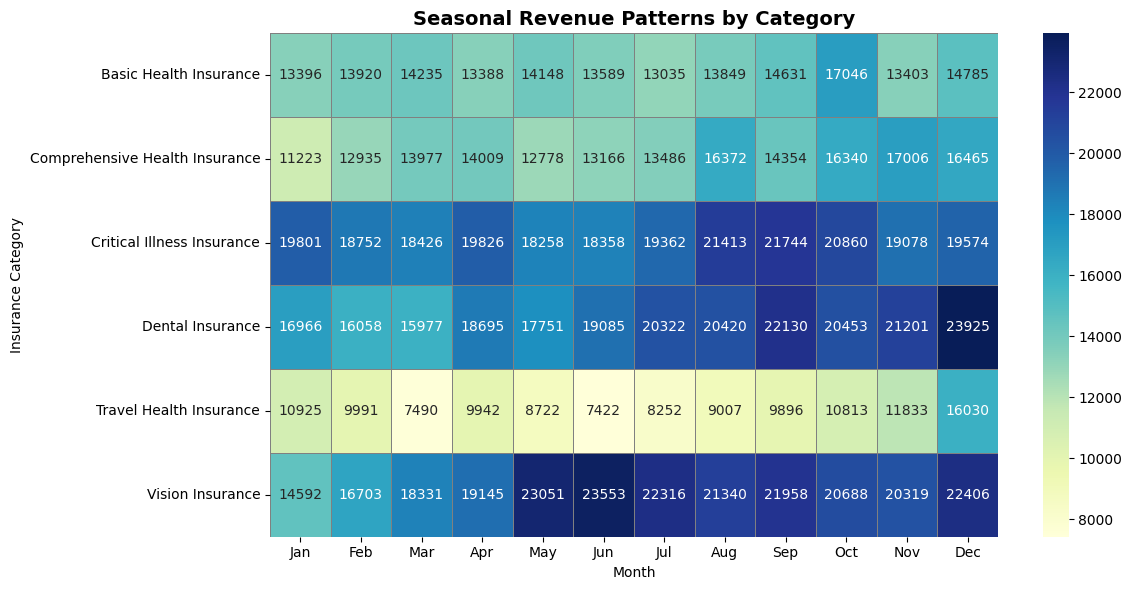

In [18]:
import seaborn as sns

# Group: average monthly revenue per category
seasonal = df.groupby(['health_insurance_category', 'month'])['revenue_(£000)'].mean().unstack().fillna(0)

# Convert month numbers to names
seasonal.columns = [calendar.month_abbr[int(m)] for m in seasonal.columns]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(seasonal, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5, linecolor='gray')
plt.title('Seasonal Revenue Patterns by Category', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Insurance Category')
plt.tight_layout()
plt.show()

